In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
import warnings as war
from IPython.display import display

In [2]:
from sklearn.datasets import load_iris

iris = load_iris()

In [10]:
print(iris)

{'data': array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
     

In [ ]:
df1 = pd.DataFrame(iris.data,columns=iris.feature_names)
display(df1)

In [15]:
df2 = pd.DataFrame(iris.target,columns=["target"])

In [22]:
df = pd.concat([df1,df2],axis=1)

In [23]:
X = df.drop("target",axis=1)
y = df["target"]

In [20]:
from sklearn.preprocessing import StandardScaler
scale = StandardScaler()
X = scale.fit_transform(X)

In [24]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
X = pca.fit_transform(X)



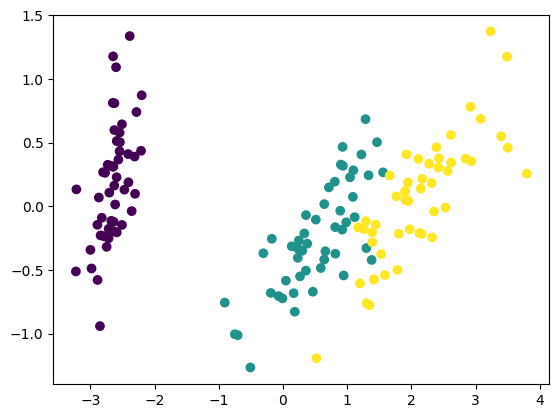

In [27]:
plt.scatter(X[:,0],X[:,1],c=y)

{'icoord': [[15.0, 15.0, 25.0, 25.0],
  [5.0, 5.0, 20.0, 20.0],
  [35.0, 35.0, 45.0, 45.0],
  [65.0, 65.0, 75.0, 75.0],
  [55.0, 55.0, 70.0, 70.0],
  [40.0, 40.0, 62.5, 62.5],
  [95.0, 95.0, 105.0, 105.0],
  [115.0, 115.0, 125.0, 125.0],
  [100.0, 100.0, 120.0, 120.0],
  [85.0, 85.0, 110.0, 110.0],
  [51.25, 51.25, 97.5, 97.5],
  [12.5, 12.5, 74.375, 74.375],
  [165.0, 165.0, 175.0, 175.0],
  [155.0, 155.0, 170.0, 170.0],
  [145.0, 145.0, 162.5, 162.5],
  [135.0, 135.0, 153.75, 153.75],
  [43.4375, 43.4375, 144.375, 144.375],
  [195.0, 195.0, 205.0, 205.0],
  [185.0, 185.0, 200.0, 200.0],
  [215.0, 215.0, 225.0, 225.0],
  [235.0, 235.0, 245.0, 245.0],
  [220.0, 220.0, 240.0, 240.0],
  [192.5, 192.5, 230.0, 230.0],
  [265.0, 265.0, 275.0, 275.0],
  [285.0, 285.0, 295.0, 295.0],
  [305.0, 305.0, 315.0, 315.0],
  [290.0, 290.0, 310.0, 310.0],
  [270.0, 270.0, 300.0, 300.0],
  [325.0, 325.0, 335.0, 335.0],
  [345.0, 345.0, 355.0, 355.0],
  [330.0, 330.0, 350.0, 350.0],
  [285.0, 285.0, 340

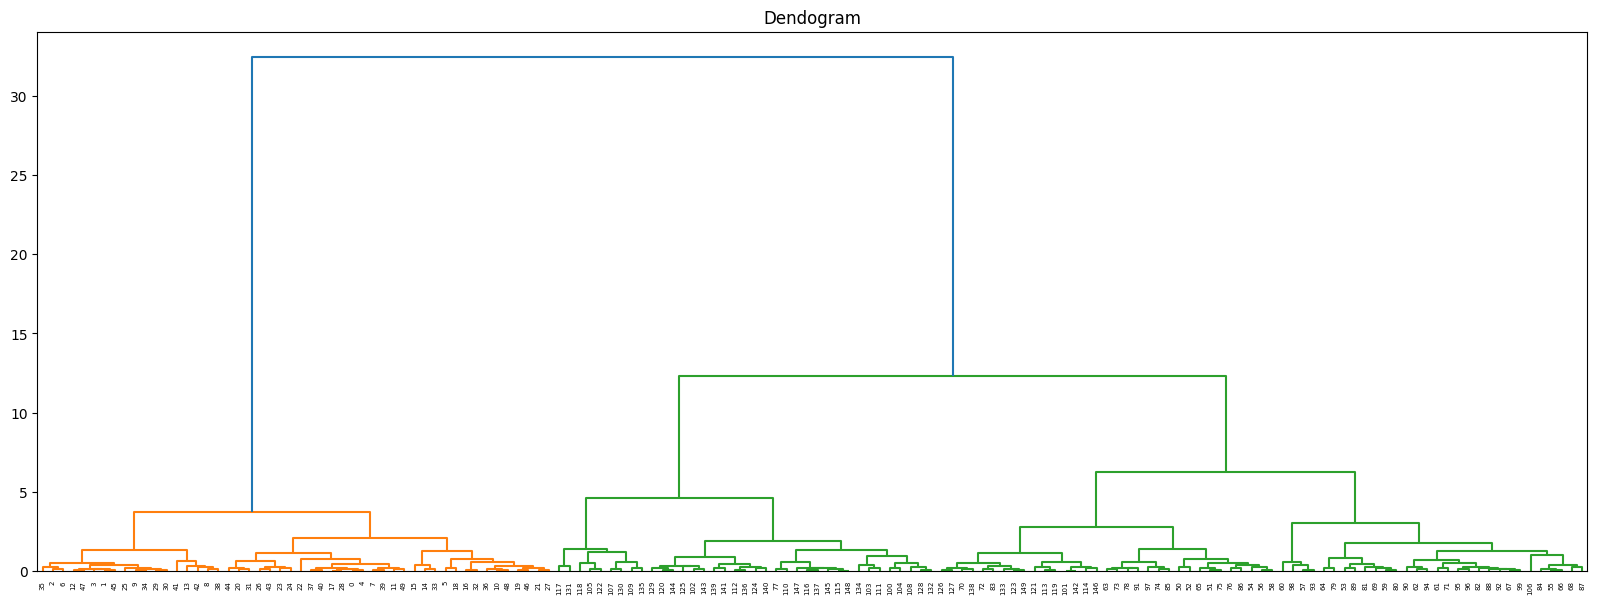

In [ ]:
## Creating the Dendogram
import scipy.cluster.hierarchy as sc

plt.figure(figsize=(20,7))
plt.title("Dendogram")

sc.dendrogram(sc.linkage(X,method="ward"))

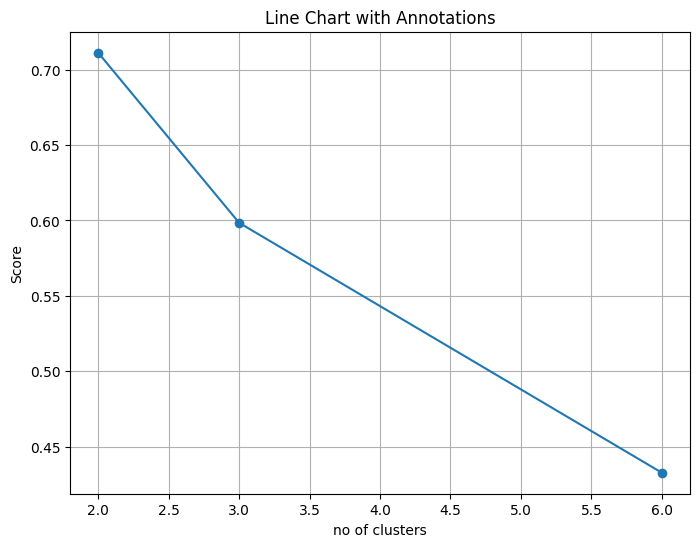

In [31]:
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import silhouette_score

points = [2,3,6]
scores=[]
for k in points:

    aggcluster = AgglomerativeClustering(n_clusters=k,linkage="ward")
    aggcluster.fit(X)
    y_pred = aggcluster.labels_
    score = silhouette_score(X,labels=y_pred)
    scores.append(score)

plt.figure(figsize=(8, 6))
plt.plot(points, scores, marker='o', linestyle='-')
plt.title('Line Chart with Annotations')
plt.xlabel('no of clusters')
plt.ylabel('Score')

plt.grid(True)
plt.show()

